In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Read the csv file into a pandas DataFrame

fla = pd.read_csv('Florida_3.csv')
fla.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BorrID,LoanStatus,GrossApproval,SBAGuaranteed,InterestRate,...,NaicsCode,NaicsDescription,JobsSupported,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,Hayes Environmental Consulting,701 Hummingbird Street,Lynn Haven,FL,32444,541,CHGOFF,25000,21250,8.00,...,541330,Engineering Services,1,COMM EXPRS,Community Express,Umpqua Bank,"445 SE Main St, First Fl",ROSEBURG,OR,97470
1,Around the Clock Fitness,1242 SW Pine Island.,Cape coral,FL,33991,8127,PIF,521800,469620,6.00,...,713990,All Other Amusement and Recreation Industries,20,PLP,Guaranty,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042
2,"Integrated Metering Systems, I","11701 South Belcher Road, Sui",Largo,FL,33773,4025,PIF,40800,34680,6.00,...,335311,"Power, Distribution, and Specialty Transformer...",23,PLP,Guaranty,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901
3,Loving Enterprises Inc and 2 P,7885 Boca Ciega Drive,SAINT PETERSBURG,FL,33706,7228,PIF,332000,249000,5.50,...,453220,"Gift, Novelty, and Souvenir Stores",21,PLP,Guaranty,"PNC Bank, National Association",222 Delaware Ave,WILMINGTON,DE,19801
4,Lawrence J. Roberts & Associat,249 Catalonia Avenue.,Coral gables,FL,33134,1508,EXEMPT,225000,112500,5.95,...,541110,Offices of Lawyers,3,SBA EXPRES,FA$TRK (Small Loan Express),TotalBank,100 SE 2nd St,MIAMI,FL,33131


In [6]:
X = fla[["LoanStatus", "GrossApproval", "SBAGuaranteed"]]
y = fla["COAmount"].values.reshape(-1, 1)
print(X.shape, y.shape)

(15137, 3) (15137, 1)


In [7]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["LoanStatus"])
data_binary_encoded.head()

,GrossApproval,SBAGuaranteed,LoanStatus_CHGOFF,LoanStatus_COMMIT,LoanStatus_EXEMPT,LoanStatus_PIF
0,25000,21250,1,0,0,0
1,521800,469620,0,0,0,1
2,40800,34680,0,0,0,1
3,332000,249000,0,0,0,1
4,225000,112500,0,0,1,0


In [14]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=59)

X_train.head()

,GrossApproval,SBAGuaranteed,LoanStatus_CHGOFF,LoanStatus_COMMIT,LoanStatus_EXEMPT,LoanStatus_PIF
4691,100000,50000,0,0,0,1
15049,50000,25000,0,0,1,0
10245,25000,12500,0,0,0,1
11370,228400,114200,0,0,1,0
12257,434800,326100,0,0,1,0


In [15]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [17]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["SBAGuaranteed"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["SBAGuaranteed"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

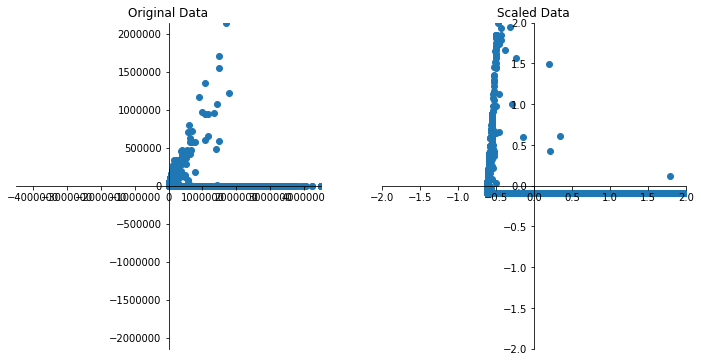

In [18]:
plt.show()

In [19]:
fla.corr()

,BorrZip,BorrID,GrossApproval,SBAGuaranteed,InterestRate,TermMonths,ApprovalFiscalYear,Days2Funded,Status,COFiscalYear,COAmount,PrinBalanceCollected,DaysRemainingAtCO,MonthsRemainingAtCO,NaicsCode,JobsSupported,BankZip
BorrZip,1.000000,-0.011141,0.021308,0.020373,-0.066152,0.058260,0.027121,-0.025972,-0.024614,0.023885,-0.010824,0.021974,0.057076,0.057085,-0.006148,0.003382,0.029822
BorrID,-0.011141,1.000000,0.050410,0.053166,-0.081250,0.046447,-0.086432,0.005445,-0.330870,0.323011,-0.159097,0.060290,-0.064577,-0.064797,-0.010185,0.010849,0.228858
GrossApproval,0.021308,0.050410,1.000000,0.994351,-0.342449,0.450038,0.071109,-0.006113,-0.077507,0.078380,0.025925,0.998065,0.426055,0.425964,0.061152,0.308003,-0.042108
SBAGuaranteed,0.020373,0.053166,0.994351,1.000000,-0.340474,0.437010,0.062264,-0.004355,-0.074426,0.075092,0.027710,0.992306,0.411435,0.411343,0.056563,0.305597,-0.035468
InterestRate,-0.066152,-0.081250,-0.342449,-0.340474,1.000000,-0.303981,0.042288,-0.007558,0.076635,-0.083711,-0.023402,-0.340883,-0.249182,-0.248635,-0.050704,-0.185066,0.023198
TermMonths,0.058260,0.046447,0.450038,0.437010,-0.303981,1.000000,0.082813,-0.050488,-0.152372,0.147000,-0.042774,0.452554,0.927425,0.927199,0.172042,0.061121,-0.004241
ApprovalFiscalYear,0.027121,-0.086432,0.071109,0.062264,0.042288,0.082813,1.000000,-0.019968,-0.189722,0.203921,-0.087704,0.076541,0.360886,0.361581,0.011010,-0.032828,-0.186446
Days2Funded,-0.025972,0.005445,-0.006113,-0.004355,-0.007558,-0.050488,-0.019968,1.000000,-0.034825,0.035562,-0.003982,-0.005864,-0.030440,-0.030256,-0.001960,0.016105,-0.047057
Status,-0.024614,-0.330870,-0.077507,-0.074426,0.076635,-0.152372,-0.189722,-0.034825,1.000000,-0.979893,0.478973,-0.107275,0.033067,0.032909,-0.007061,-0.023183,0.124258
COFiscalYear,0.023885,0.323011,0.078380,0.075092,-0.083711,0.147000,0.203921,0.035562,-0.979893,1.000000,-0.445144,0.106044,-0.038179,-0.038034,0.008612,0.025844,-0.135898


In [20]:
X = pd.get_dummies(fla[["GrossApproval", "SBAGuaranteed", "LoanStatus"]])
y = fla["COAmount"].values.reshape(-1, 1)
X.head()

,GrossApproval,SBAGuaranteed,LoanStatus_CHGOFF,LoanStatus_COMMIT,LoanStatus_EXEMPT,LoanStatus_PIF
0,25000,21250,1,0,0,0
1,521800,469620,0,0,0,1
2,40800,34680,0,0,0,1
3,332000,249000,0,0,0,1
4,225000,112500,0,0,1,0


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

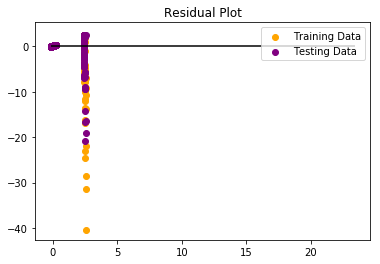

In [23]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="orange", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="purple", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7227943567574514, R2: 0.24766699422407012
